# Git Log analyzation

With git, we can turn log timestamps into csv-like data as follows:

```shell
git log --pretty="%ad%x09%aN%x09%ae" > $out_path/pycroft.csv
```

Here, `%ad` signifies for the date, `%aN` the Name, and `%ae` the e-mail.

In [2]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
filename = './pycroft.csv'
repo_url = 'https://github.com/agdsn/pycroft.git'

In [182]:
%%bash -s $repo_url $filename
out_dir="./repo.git"
out_file=$(realpath $2)
echo "Writing to $out_file"
rm -rf $out_dir
git clone --bare -q $1 $out_dir
(cd $out_dir && git log --pretty="%ad,%aN,%ae" > $out_file)

Writing to /home/lukas/code/ipy/pycroft.csv


In [3]:
git_log = pd.read_csv(filename, sep=',', encoding="utf-8", header=None, names=['timestamp', 'author', 'email'])

In [4]:
git_log.head()

,timestamp,author,email
0,Mon Jul 1 19:53:51 2019 +0200,Jakob Müller,j.mueller@outlook.de
1,Sun Jun 23 19:35:52 2019 +0200,Jakob Müller,j.mueller@outlook.de
2,Thu Jun 20 19:16:13 2019 +0200,Jakob Müller,j.mueller@outlook.de
3,Thu Jun 20 17:45:52 2019 +0200,Jakob Müller,j.mueller@outlook.de
4,Sun Jun 16 08:49:39 2019 +0200,Lukas Juhrich,lukas.juhrich@agdsn.de


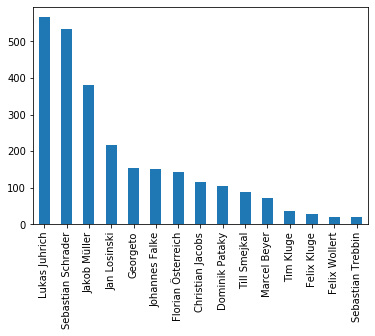

In [5]:
git_log.author.value_counts().head(15).plot.bar()

In [6]:
git_log.timestamp = pd.to_datetime(git_log.timestamp, utc=True)

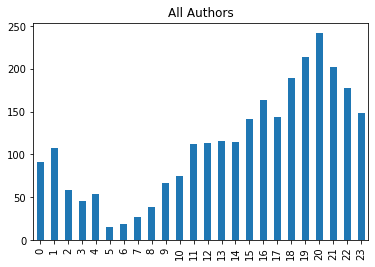

In [7]:
commits_per_hour = git_log.timestamp.dt.hour.value_counts().sort_index()
commits_per_hour.head()

commits_per_hour.plot.bar(title="All Authors")

In [9]:
@interact(log=fixed(git_log), author=[None] + git_log.author.value_counts().index.to_list())
def author_bars(log, author=None):
    log = git_log if not author else git_log.loc[git_log.author == author]
    hour_series = log.timestamp.dt.hour.value_counts().sort_index()
    consolidated = (hour_series + pd.Series([0]*24)).fillna(0)
    return consolidated.plot.bar(title=author or "All authors")

interactive(children=(Dropdown(description='author', options=(None, 'Lukas Juhrich', 'Sebastian Schrader', 'Ja…